In [1]:
print('Data Visualization Case Study')

Data Visualization Case Study


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import *

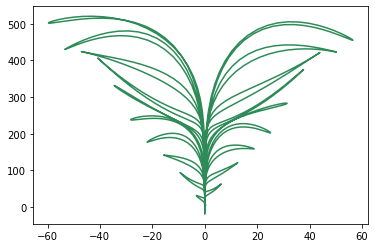

In [3]:
t= np.linspace(0, 39*np.pi/2, 1000)
x= t*np.cos(t)**3
y= 9*t*np.sqrt(abs(np.cos(t)))+ t*np.sin(0.2*t)*np.cos(4*t)
plt.plot(x,y,c= 'seagreen')
plt.show()

In [4]:
gps = pd.read_csv('googleplaystore_v2.csv', header=0)

gps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
gps.shape

(10841, 13)

In [6]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [7]:
gps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
###The first few steps involve making sure that there are no missing values or incorrect data types before we proceed to the analysis stage. These aforementioned problems are handled as follows:

# For Missing Values: Some common techniques to treat this issue are
# Dropping the rows containing the missing values
# Imputing the missing values
#Keep the missing values if they don't affect the analysis
# Incorrect Data Types:
# Clean certain values
# Clean and convert an entire column

In [8]:
### Dropping Ratings with null values

gps1= gps[~gps.Rating.isnull()]
gps1.shape

(9367, 13)

In [9]:
gps1.Rating.isnull().sum()

0

In [10]:
gps1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [11]:
## Modification and droping android version null

gps1[gps1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
gps1 = gps1[~(gps1['Android Ver'].isnull() & (gps1.Category=='1.9'))]

In [14]:
gps1[gps1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [15]:
gps1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [16]:
gps1['Android Ver'].mode()[0]

'4.1 and up'

In [17]:
gps1['Android Ver']= gps1['Android Ver'].fillna(gps1['Android Ver'].mode()[0])

In [18]:
gps1['Android Ver'].isnull().sum()

0

In [19]:
gps1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [20]:
gps1['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

In [21]:
gps1['Current Ver'].mode()[0]

'Varies with device'

In [22]:
gps1['Current Ver']= gps1['Current Ver'].fillna(gps1['Current Ver'].mode()[0])

In [23]:
gps1['Current Ver'].isnull().sum()

0

In [24]:
gps1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [25]:
gps1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [26]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up" 

#Analyse the Price column to check the issue
gps1.Price.value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [45]:
gps1["Price"]=gps1["Price"].apply(lambda x: 0 if x=="0" else float(x[1:]))

In [47]:
gps1.Price.dtypes

dtype('float64')

In [46]:
gps1.Price.value_counts()

0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

In [29]:
gps1.Price.apply(lambda x: ["Android Ver"] =="4.1 and up").mean()

0.0

In [30]:
## reviews column

gps1.Reviews= gps1.Reviews.astype('int32')

In [31]:
gps1.Reviews.dtypes

dtype('int32')

In [32]:
## they way install is changed

text = 'bat ball'

# replace b with c
replaced_text = text.replace('b', 'c')
print(replaced_text)

cat call


In [40]:
## install coloumns to int. removing ,

gps1["Installs"]=gps1["Installs"].apply(lambda x : int(x.replace(',','').replace('+','')))

In [41]:
gps1.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [43]:
gps1.Installs.dtype

dtype('int64')

In [42]:
m= gps1.groupby(by=["Android Ver", "Price"]).mean()
m.describe()

,Rating,Reviews,Size,Installs
count,270.000000,2.700000e+02,270.000000,2.700000e+02
mean,4.223316,3.394030e+04,17905.775883,1.467657e+06
std,0.439696,1.555200e+05,16360.764672,8.555967e+06
min,2.000000,1.000000e+00,17.000000,1.000000e+01
25%,4.062707,5.508333e+01,4291.812500,1.000000e+03
50%,4.300000,5.442500e+02,15632.396175,1.000000e+04
75%,4.500000,7.070000e+03,25696.766971,6.630156e+04
max,5.000000,1.791731e+06,100000.000000,1.000000e+08


In [49]:
#### Sanity Check

print('#### Sanity Check')
print('#### Sanity Check')
print('#### Sanity Check')
print('#### Sanity Check')
print('#### Sanity Check')

#### Sanity Check
#### Sanity Check
#### Sanity Check
#### Sanity Check
#### Sanity Check


In [48]:
gps1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [50]:
### ratings must be bw 1-5

gps1.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [52]:
### Reviews should be <= Installs

gps1[(gps1.Reviews > gps1.Installs)].shape 

## as it shows their are 7 rows where reviews are higher then Installs, will droop them

(7, 13)

In [54]:
### checking Reviews rows needs to be droped

gps1[(gps1.Reviews > gps1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [55]:
### dropig Reviews rows
gps1 = gps1[(gps1.Reviews <= gps1.Installs)] 

In [56]:
## re check reviews condition

gps1[(gps1.Reviews > gps1.Installs)].shape 

(0, 13)

In [57]:
## Free apps price should not be more then '0'

gps1[(gps1.Type== 'Free') & (gps1.Price >0)]

#### no rows found, hence data is clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [64]:
gps1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [62]:
gps1.describe()

,Rating,Reviews,Size,Installs,Price
count,9359.000000,9.359000e+03,9359.000000,9.359000e+03,9359.000000
mean,4.191174,5.144332e+05,22710.768864,1.791083e+07,0.961116
std,0.514966,3.145187e+06,21311.274234,9.127102e+07,15.822478
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,1.870000e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.960000e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.164100e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [63]:
gps1['Price'].describe()

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

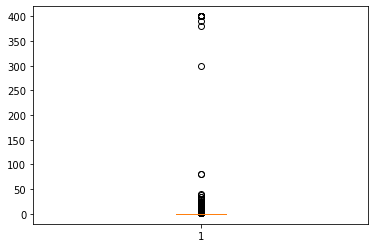

In [69]:
### Handaling Outliers

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.boxplot(gps1.Price)
plt.show()



In [72]:
## checking for fraud data in price above 200

gps1[gps1.Price >=200].head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


In [73]:
## remove data above price 200

gps1= gps1[gps1.Price <200]

gps1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

<AxesSubplot:>

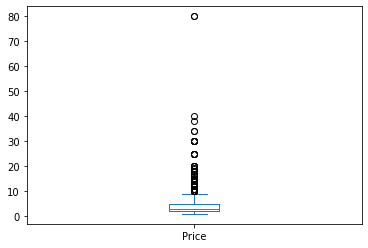

In [74]:
## plot box again for price >0 & <200 using direct command

gps1[gps1.Price > 0].Price.plot.box()

In [76]:
#### again reduce price range to 30

gps1[gps1.Price >=30]
gps1= gps1[gps1.Price <30]

gps1.Price.describe()

count    9338.000000
mean        0.301915
std         1.669887
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        29.990000
Name: Price, dtype: float64

<AxesSubplot:>

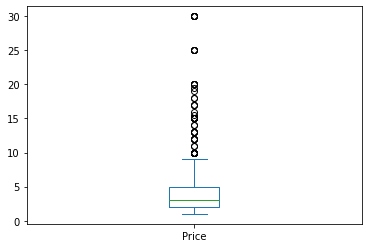

In [77]:
## plot box again for price >0 & <200 using direct command

gps1[gps1.Price > 0].Price.plot.box()

In [82]:
gps1.shape

(9338, 13)

In [80]:
print('HIstogram')
print('HIstogram')
print('HIstogram')
print('HIstogram')
print('HIstogram')
print('HIstogram')


HIstogram
HIstogram
HIstogram
HIstogram
HIstogram
HIstogram


In [84]:
### for Reviews

?plt.hist

Object `plt.hist()` not found.


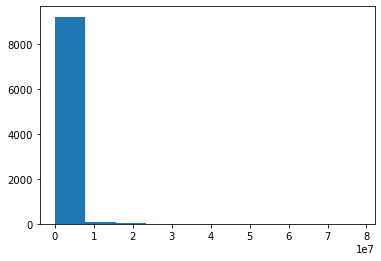

In [87]:
plt.hist(gps1.Reviews)
plt.show()

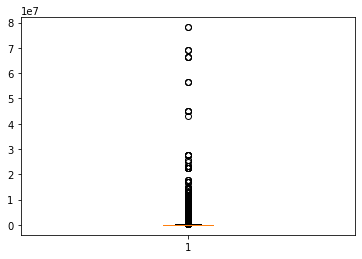

In [89]:
### comapre with box plot

plt.boxplot(gps1.Reviews)
plt.show()

In [91]:
## as data is in range of over Billion hence check and remove the reviews over 1 Million

gps1[gps1.Reviews> 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


In [94]:
gps1= gps1[gps1.Reviews<=1000000]
gps1.shape

(8634, 13)

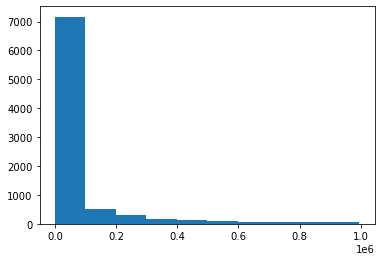

In [98]:
### Practice test

plt.hist(gps1.Reviews)
plt.show()

In [100]:
## IQR for Installs

gps1.describe()

,Rating,Reviews,Size,Installs,Price
count,8634.000000,8634.000000,8634.000000,8.634000e+03,8634.000000
mean,4.172492,68383.348853,21636.459060,4.288536e+06,0.324913
std,0.528913,156335.806417,20663.668474,2.864650e+07,1.731362
min,1.000000,1.000000,8.500000,5.000000e+00,0.000000
25%,4.000000,143.250000,6000.000000,1.000000e+04,0.000000
50%,4.300000,3641.000000,18000.000000,1.000000e+05,0.000000
75%,4.500000,46070.500000,26000.000000,1.000000e+06,0.000000
max,5.000000,995002.000000,100000.000000,1.000000e+09,29.990000


In [106]:
### Remove Installs over 100M

gps1= gps1[gps1.Reviews< 100000000]
gps1.shape

(8634, 13)

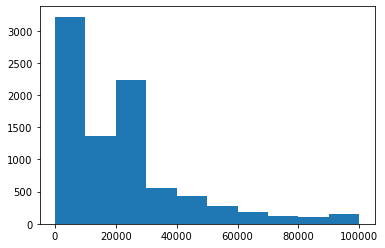

In [111]:
### plots histo for Size

plt.hist(gps1.Size, bins= 10)
plt.show()

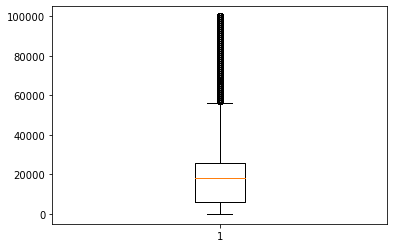

In [112]:
### box plot for size and medin value

plt.boxplot(gps1.Size)
plt.show()

In [113]:
gps1.Size.describe()

count      8634.000000
mean      21636.459060
std       20663.668474
min           8.500000
25%        6000.000000
50%       18000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

In [115]:
######### Histogram Vs Bar


option 3 a needs bar b needs histrogram

SyntaxError: invalid syntax (1136667667.py, line 4)